# Crowfunding Analysis.
### Using kiva.org datasets

> Notes:
Description for Kiva Dataset:

- `id`: Unique ID untuk masing-masing loan (loan ID)
- `funded_amount`: Jumlah yang dicairkan oleh Kiva ke agen (USD)
- `loan_amount`: Jumlah yang disalurkan oleh agen ke peminjam (USD)
- Additional
	- `use` = fungsi/tujuan peminjaman
	- `loan_amount` = adalah jumlah dana yang dibutuhkan oleh borrower (peminjam).
	- `funded_amount` = biasanya sama atau lebih kecil dari loan_amount:
		- Sama: Jika seluruh jumlah yang dibutuhkan berhasil terkumpul.
		- Lebih kecil: Jika belum seluruhnya terkumpul, tetapi Kiva memutuskan tetap mendistribusikan sebagian yang sudah terkumpul.
- `activity`: Kategori lebih spesifik dari `sector`
-	 `sector`: Kategori dari loan
-	 `country`: Nama negara lengkap, tempat pinjaman dicairkan
-	`region`: Nama wilayah lengkap dari `country`
-	`currency`: Mata uang
-	`partner_id`: ID untuk organisasi partner
-	`posted_time`: Waktu pinjaman di-posting di Kiva oleh agen
-	`funded_time`: Waktu pinjaman telah sepenuhnya dibiayai oleh pemberi pinjaman
-	`term_in_months`: Durasi pencairan pinjaman (dalam satuan bulan)
-	`lender_count`: Banyaknya peminjam yang berkontribusi
-	`repayment_interval`: Cara pelunasan peminjaman

---
---

> ### Import Libraries, Ignore Warnings, Set to decimals (two decimal numbers behind commas)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from scipy.stats import shapiro
from scipy.stats import f_oneway as anova

import warnings 
warnings.filterwarnings('ignore') 
pd.set_option("display.float_format", lambda x: "%.2f" % x)


In [3]:
df = pd.read_csv("kiva_loan.csv")
df.tail()

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
671200,1340323,0.00,25.00,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",Paraguay,Concepción,USD,58.00,2017-07-25 16:55:34+00:00,NaN,13.00,0,monthly
671201,1340316,25.00,25.00,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,NaN,KES,138.00,2017-07-25 06:14:08+00:00,2017-07-26 02:09:43+00:00,13.00,1,monthly
671202,1340334,0.00,25.00,Games,Entertainment,NaN,Kenya,NaN,KES,138.00,2017-07-26 00:02:07+00:00,NaN,13.00,0,monthly
671203,1340338,0.00,25.00,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,NaN,KES,138.00,2017-07-26 06:12:55+00:00,NaN,13.00,0,monthly
671204,1340339,0.00,25.00,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,NaN,KES,138.00,2017-07-26 06:31:46+00:00,NaN,13.00,0,monthly


---
---

> ## Data Cleaning
- Check duplicated
- Check missing value
- Check nunique (unique value)

In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

id                        0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                    4232
country                   0
region                56800
currency                  0
partner_id            13507
posted_time               0
funded_time           48331
term_in_months            0
lender_count              0
repayment_interval        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country             671205 non-null  object 
 7   region              614405 non-null  object 
 8   currency            671205 non-null  object 
 9   partner_id          657698 non-null  float64
 10  posted_time         671205 non-null  object 
 11  funded_time         622874 non-null  object 
 12  term_in_months      671205 non-null  float64
 13  lender_count        671205 non-null  int64  
 14  repayment_interval  671205 non-null  object 
dtypes: float64(4), int64(2), object(9)

In [7]:
df.nunique()

id                    671205
funded_amount            610
loan_amount              479
activity                 163
sector                    15
use                   424912
country                   87
region                 12695
currency                  67
partner_id               366
posted_time           667399
funded_time           498007
term_in_months           148
lender_count             503
repayment_interval         4
dtype: int64

In [8]:
df[df['funded_time'].isna()].head(1)

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
87,653261,4275.00,5000.00,Personal Housing Expenses,Housing,"to pave the ground and repair the ceiling, to ...",Palestine,jenin,USD,122.00,2014-01-02 09:53:45+00:00,NaN,39.00,58,monthly


#### Changing or converting the missing value `(NAN) to Unknown`

In [9]:
df['region'] = df['region'].fillna('Unknown')
df['use'] = df['use'].fillna('Unknown')
df['partner_id'] = df['partner_id'].fillna('Unknown')

Ignore the Missing Value from funded_time, 

In [10]:
df['funded_time'] = pd.to_datetime(df['funded_time'], errors ='coerce')

In [11]:
df[df['funded_time'].isna()].head(2)

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
87,653261,4275.00,5000.00,Personal Housing Expenses,Housing,"to pave the ground and repair the ceiling, to ...",Palestine,jenin,USD,122.00,2014-01-02 09:53:45+00:00,NaT,39.00,58,monthly
112,653256,1925.00,2400.00,Electronics Repair,Services,to pay the annual rent for his shop,Iraq,Unknown,USD,166.00,2014-01-02 09:44:10+00:00,NaT,15.00,41,monthly


In [12]:
df[df['funded_time'] == 'Not Fully Funded'].head(3)

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval


---
---

> ## Enhanced Framework for Data Science Exploration at CLUVIES

## Introduction
CLUVIES aims to leverage the Kiva dataset for comprehensive insights into microfinance trends, repayment dynamics, and sectoral preferences. This framework outlines a structured approach to data exploration, focusing on key metrics, fraud detection, and correlation analysis, finding something unique and interesting in everything.

### Phase 1: Data Inspection and Cleaning
General Statistics
- Summary Metrics: Compute min, max, mean, mode, sum, and value_counts for numerical fields like loan_amount and funded_amount.

- Data Distribution: Visualize histograms for loan_amount and funded_amount to identify skewness.

- Data Quality Checks
  - Missing Values: Identify and impute missing data in fields like region using geopy or regional averages.
  - Duplicates: Remove duplicate entries based on id.
  - Fraud/Scam Detection
  - Anomaly Detection: Use techniques like Isolation Forest or Local Outlier Factor (LOF) to identify suspicious transactions.

- Convert their money to IDR (Indonesian Rupiah), because CLUVIES is based in Indonesia

### Phase 2: Temporal and Repayment Analysis
Payment and Funding Times
- Time Series Analysis: Plot posted_time vs. funded_time to assess funding efficiency.
- Duration Analysis: Calculate the average time taken for loans to be fully funded.
- Repayment Interval Analysis
  - Categorical Analysis: Examine the distribution of repayment_interval (e.g., monthly vs. bullet payments).
- Temporal Trends: Analyze repayment patterns over time to identify seasonal effects.

### Phase 3: Correlation and Sectoral Analysis
Correlation Analysis
- Sector-Activity Correlation: Use heatmaps & sunburst to visualize correlations between sector, activity, and other categorical variables.

- Numerical Correlations: Compute Pearson’s r for continuous variables like loan_amount and lender_count.

- Sectoral Preferences
- Top Sectors and Activities: Identify the most common sector and activity for both borrowers and lenders.
- Investment Patterns: Analyze which sectors attract the most investments.
- Rare case: Are there any rare case found in the dataset?

### Phase 4: Advanced Insights
Loan Cycle Analysis
- Loan Duration: Calculate the average time borrowers take to repay loans.
- Lender Participation: Examine how long lenders typically participate in funding loans.

### Phase 5: Others? (Soon-to-be-added)

> 1. Check Fraud / Scam or Negative purposes of lending money, without any use or partner ID.

In [13]:
df[['use', 'sector', 'activity', 'partner_id']].isna().sum()

use           0
sector        0
activity      0
partner_id    0
dtype: int64

> Insight!
- 4232 people did not fill or post why are they're lending money from people
- But 4232 people did fill the sector and activity.
- 13507 people did not have or any partner_id (or maybe their partner is Unknown)?
  - There is a slight possibility that they do have a partner ID but does not officially listed on Kiva?
  - Or perhaps, just to test, and want to know: "What if we did not fill the `sector, activity, use, and partner ID` would people still want to lend money to them?
  - There is also a possibility they might not want to state their sector and use because...

>2. Check Which country have the most and least people post on Kiva? 
- Why? What for?

How many people in total post in Kiva from this dataset?

In [14]:
df['country'].value_counts().sum()

671205

Where are the people who posts on Kiva come from?
- (Find out how much country shows up from the dataaset)

In [15]:
df['country'].value_counts()

country
Philippines      160441
Kenya             75825
El Salvador       39875
Cambodia          34836
Pakistan          26857
                  ...  
Afghanistan           2
Bhutan                2
Guam                  1
Mauritania            1
Cote D'Ivoire         1
Name: count, Length: 87, dtype: int64

In [16]:
df['country'].mode().sum()

'Philippines'

- We found out that people from Phillipines post on Kiva a lot.
- That's why the country shows up.

---

In here. I want to find out the sector, activity, use and lender counts...

In [17]:
df1 = df[['country', 'sector', 'activity', 'use', 'lender_count']].value_counts(ascending=True).reset_index()
df1.tail()

,country,sector,activity,use,lender_count,count
557616,Cambodia,Personal Use,Home Appliances,to buy a water filter to provide safe drinking...,5,802
557617,Cambodia,Personal Use,Home Appliances,to buy a water filter to provide safe drinking...,7,837
557618,Cambodia,Personal Use,Home Appliances,to buy a water filter to provide safe drinking...,4,984
557619,Cambodia,Personal Use,Home Appliances,to buy a water filter to provide safe drinking...,5,1058
557620,Cambodia,Personal Use,Home Appliances,to buy a water filter to provide safe drinking...,4,1153


In here we're finding out about how much: 
- the country, sector, activity, and lender_count shows up in here.

In [18]:
df[['country', 'sector', 'activity','lender_count']].value_counts(ascending=False).reset_index()

,country,sector,activity,lender_count,count
0,Philippines,Retail,General Store,1,6764
1,Cambodia,Personal Use,Home Appliances,4,3547
2,Philippines,Retail,General Store,9,3479
3,Philippines,Retail,General Store,5,3388
4,Philippines,Retail,General Store,7,3249
...,...,...,...,...,...
108351,Kyrgyzstan,Food,Food Production/Sales,17,1
108352,Kyrgyzstan,Food,Food Production/Sales,12,1
108353,Kyrgyzstan,Food,Food Production/Sales,10,1
108354,Kyrgyzstan,Food,Food Market,91,1


> Aim to find top 10:
- Country, Sector, Activity, Use, and lender_count
- Which country, sector, activity and use most people use in kiva?
- how many time this people have posted on Kiva?

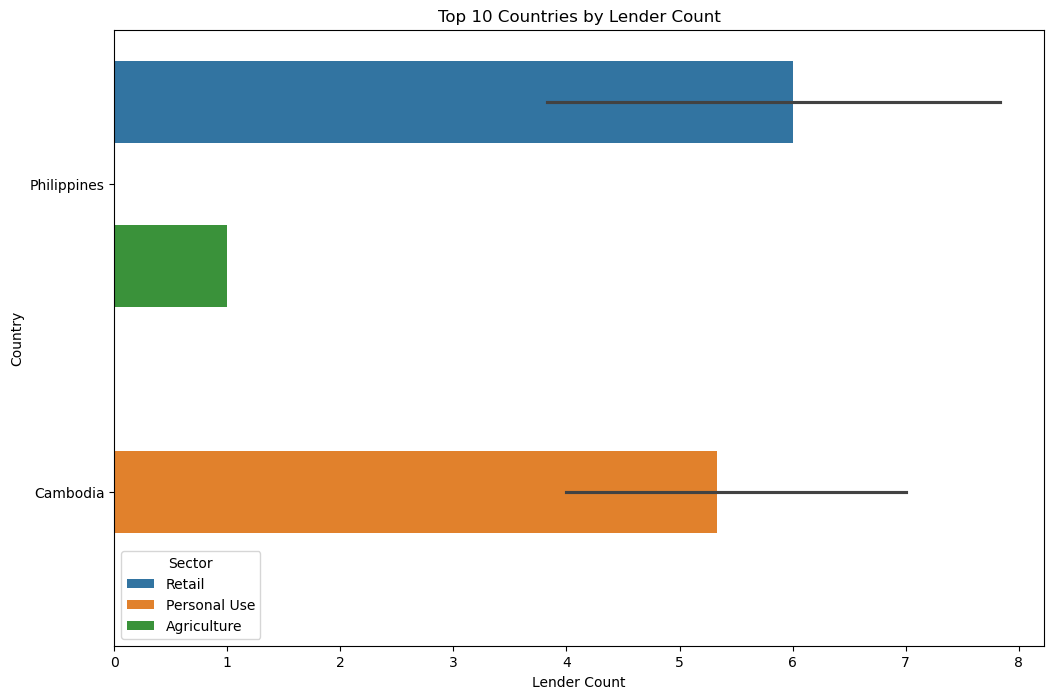

In [19]:
top_10 = df[['country', 'sector', 'activity', 'lender_count']].value_counts(ascending=False).reset_index().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10, x='lender_count', y='country', hue='sector')
plt.title('Top 10 Countries by Lender Count')
plt.xlabel('Lender Count')
plt.ylabel('Country')
plt.legend(title = 'Sector')
plt.show()

I aimed to find top 10, but unfortunately it only shows the top3.

> Insight!
- There are 6764 people in Philippines asking to lend money for their retail General Store business.
- There are 3547 people in Cambodia asking to lend money for their home appliances.
- There are 3479 people in Philippines asking to lend money for their General Store business.
- There are several people in Kyrgyzstan asking to lend money for their Food Production/Sales and Food Market business.
- There is one person in Zimbabwe asking to lend money for his/her Wholesale business.
- People tend to lend their money for:
  - Philippines for Retail business.
  - Cambodia for Personal Use.
  - And Philippines for Agriculture business.

> 3. Checking all category and activity.

In [20]:
df[['sector', 'activity']]

,sector,activity
0,Food,Fruits & Vegetables
1,Transportation,Rickshaw
2,Transportation,Transportation
3,Arts,Embroidery
4,Food,Milk Sales
...,...,...
671200,Agriculture,Livestock
671201,Agriculture,Livestock
671202,Entertainment,Games
671203,Agriculture,Livestock


In [21]:
df[['sector', 'activity']].value_counts()

sector         activity                 
Agriculture    Farming                      72955
Retail         General Store                64729
Housing        Personal Housing Expenses    32448
Food           Food Production/Sales        28106
Agriculture    Agriculture                  27023
                                            ...  
Arts           Film                            13
Manufacturing  Personal Care Products           7
Personal Use   Celebrations                     5
Services       Event Planning                   5
               Adult Care                       2
Name: count, Length: 163, dtype: int64

I found something interesting, from the output above... 
- There's several or some people using Kiva for Entertaiment purposes?
   
Let's find out why, and how many person do the same or similar thing?

In [22]:
df2 = df[(df['sector'] == 'Entertainment') & (df['activity'] == 'Games')]
df2

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
4105,657140,525.00,525.00,Games,Entertainment,"to buy supplies in bulk for his rental shop, s...",Colombia,Medellín,COP,177.00,2014-01-14 13:55:49+00:00,2014-01-17 09:33:32+00:00,14.00,21,monthly
4753,658251,300.00,300.00,Games,Entertainment,"to purchase components, replacement parts and ...",Peru,PUCALLPA,PEN,71.00,2014-01-16 20:30:28+00:00,2014-01-18 02:23:48+00:00,8.00,12,monthly
5012,657866,600.00,600.00,Games,Entertainment,to buy another pool table.,Kenya,Njabini,KES,133.00,2014-01-16 07:27:19+00:00,2014-01-18 08:22:38+00:00,14.00,23,monthly
5370,658419,650.00,650.00,Games,Entertainment,"to buy a bingo machine, bingo sheets, bingo st...",Samoa,Toamua,WST,15.00,2014-01-17 06:41:04+00:00,2014-01-17 22:17:11+00:00,14.00,25,irregular
10958,664070,375.00,375.00,Games,Entertainment,to acquire a small business premise.,Peru,"independencia, Ancash",PEN,139.00,2014-01-30 15:44:25+00:00,2014-02-26 08:04:19+00:00,14.00,15,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662702,1325258,1400.00,1400.00,Games,Entertainment,"to buy bingo packages, bingo daubers, and pape...",Samoa,Sataua,WST,15.00,2017-06-22 04:00:26+00:00,2017-07-05 00:38:02+00:00,14.00,27,irregular
670724,1337050,100.00,1275.00,Games,Entertainment,to purchase two televisions and two video game...,Colombia,turbo,COP,177.00,2017-07-10 17:23:07+00:00,NaT,26.00,4,bullet
671171,1340264,0.00,25.00,Games,Entertainment,Kiva Coordinator replaced loan use. Should see...,Kenya,Unknown,KES,138.00,2017-07-21 16:59:10+00:00,NaT,13.00,0,monthly
671174,1340275,0.00,25.00,Games,Entertainment,Unknown,Kenya,Unknown,KES,138.00,2017-07-21 23:51:18+00:00,NaT,13.00,0,monthly


- From the table above, we can find that there are 238 people that are using Kiva for `Entertaiment` purposes, especially in `Games` , activity and sector.
- Let's find out how many people lended their money for this `Entertaiment & Games` purposes?

In [23]:
len(df[(df['sector'] == 'Entertainment') & (df['activity'] == 'Games') & (df['lender_count'] > 0)])

235

We found out that even though the people are asking to lend some money from other people (strangers) they do not know for **Entertaiment and Games** purposes, yet there are 235 people who are willing to lend their money for **Entertaimemnt & Games**

> Surprising Insight!

- Even though this sector and activity, as we know `Entertaiment & Games` is not considered as top priority like foods, drinks, houses, places, for people to continue their daily life and work life, unexpectedly there are still 238  people asking strangers on the internet in the whole wide world for helps in `Entertaiment & Games`.
- Even though that this isn't top priority or needs, but there are 235 people in the whole wide world who's willing to help the 238 people earlier, who's asking to lend strangers from the internet (and the whole wide world) for `Entertaiment & Games`.
- Therefore, not only top priority needs (to continue people's life, work, and and educational purposes) that are available on Kiva
- There are non-top-priority too, like `Entertaiment & Games` section as well.
- Surprisingly a lot of people help and contributed in this `Entertaiment & Games`.

---

Now, let's find out what's the top sector and activity that shows up the most from the dataset?

In [24]:
df[['sector', 'activity']].mode()

,sector,activity
0,Agriculture,Farming


> Insight!
- The sector that appears most frequently and has the highest occurrence is the `Agriculture` sector, specifically with the `Farming` activity.

How many sectors are there? What are those?

In [25]:
df['sector'].value_counts().reset_index()

,sector,count
0,Agriculture,180302
1,Food,136657
2,Retail,124494
3,Services,45140
4,Personal Use,36385
5,Housing,33731
6,Clothing,32742
7,Education,31013
8,Transportation,15518
9,Arts,12060


We can find out that there are 15 sectors from the dataset (14, because python indexing starting with 0)

How many diiplicated activity that are in the dataset?

In [26]:
df[['activity']].duplicated().value_counts().reset_index()

,index,count
0,True,671042
1,False,163


We found out that there are 671.042 duplicated activity from Kiva dataset.

New thing to explore.

- Across the countries in this dataset, what is the distribution of sectors and activities for which borrowers are seeking funding?
- Quantify the demand for each sector and activity within each country by counting the number of loan requests.

In [27]:
# Why? What for?
df2 = df[['country', 'sector', 'activity']].value_counts().sort_values(ascending=False).reset_index()
df2

,country,sector,activity,count
0,Philippines,Retail,General Store,42960
1,Kenya,Agriculture,Farming,20555
2,Philippines,Agriculture,Pigs,19985
3,Cambodia,Personal Use,Home Appliances,16362
4,Philippines,Agriculture,Farming,11924
...,...,...,...,...
6265,Moldova,Food,Bakery,1
6266,Moldova,Education,Higher education costs,1
6267,Moldova,Construction,Well digging,1
6268,Moldova,Construction,Cement,1


There are 6270 data, that shows Countries, Sectors, and Activities, and how much is the loan request are?
- now let's dropping the duplicates and see.

In [28]:
# Why? What for?
df2= df[['country', 'sector', 'activity']].value_counts(ascending=False).reset_index().drop_duplicates().head(10)
df2

,country,sector,activity,count
0,Philippines,Retail,General Store,42960
1,Kenya,Agriculture,Farming,20555
2,Philippines,Agriculture,Pigs,19985
3,Cambodia,Personal Use,Home Appliances,16362
4,Philippines,Agriculture,Farming,11924
5,Philippines,Food,Fish Selling,9060
6,Philippines,Food,Fishing,8682
7,Philippines,Food,Food Production/Sales,8675
8,Cambodia,Agriculture,Farming,8545
9,Philippines,Housing,Personal Housing Expenses,6591


Showing the top 3 Countries that shows up a lot, also the sector and the category that shows up the most from each countries in Sunburst visualization.

In [29]:
fig = px.sunburst(
    df2,
    path=['country', 'sector', 'activity'],
    values='count',
    color='country',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title='Top 3 Countries by Sector and Activity',
    width= 1000, # size
    height= 1000 # size
)

fig.update_layout(title_x=0.5)
fig.show()

> Insight!
Top 3 Country for sector and activity count the most are:
1. Philippines for:
   -  `Retail`, all of them planned to use it for General Store Retail: 42.960 people
   -  `Agriculture`:
       - `Farming`: 11.924 people for farming.
       - `Pigs`: 19.985 people for breeding pigs in their farms/barns.
   - `Food`:
           - `Fish Selling`: 9.060 people for Fish Selling business
           - `Fishing`: 8.682 people for fishing needs.
           - Food `Production/Sales`: 8675 people
2. `Kenya` for `Agriculture and Farming`: 20.555 people, all of them goes straight for Farming in Agiculture business.
3. `Cambodia` for :
    - `Personal Use`, 16.362 people for their personal use to support their daily life.
    - `Agriculture & Farming` 8.585 people, all of them goes straight for Farming, in Agriculture business.

---
---

### Top 10 category (Sector & Activity) that most & least funded by Lender Count?


In [30]:
df3 = df[['sector', 'activity', 'lender_count']].value_counts().reset_index().head(10)
df3

,sector,activity,lender_count,count
0,Retail,General Store,1,7122
1,Retail,General Store,9,4334
2,Retail,General Store,7,4110
3,Retail,General Store,5,4068
4,Retail,General Store,8,4053
5,Retail,General Store,6,3937
6,Personal Use,Home Appliances,4,3678
7,Agriculture,Farming,8,3666
8,Personal Use,Home Appliances,5,3459
9,Agriculture,Farming,6,3280


In [31]:
# Total lenders per sector-activity
df3 = df.groupby(['sector', 'activity'])['lender_count'].sum().reset_index(name='total_lenders')
df3

,sector,activity,total_lenders
0,Agriculture,Agriculture,726760
1,Agriculture,Animal Sales,255834
2,Agriculture,Aquaculture,2077
3,Agriculture,Beekeeping,2140
4,Agriculture,Cattle,204180
...,...,...,...
158,Transportation,Rickshaw,42505
159,Transportation,Taxi,65101
160,Transportation,Transportation,81669
161,Wholesale,Goods Distribution,13337


In [32]:
# Top 10 most funded
x1 = df3.sort_values('total_lenders', ascending=False).head(10)
x1

,sector,activity,total_lenders
7,Agriculture,Farming,1388340
94,Retail,General Store,858478
0,Agriculture,Agriculture,726760
68,Housing,Personal Housing Expenses,616459
37,Education,Higher education costs,594626
54,Food,Food Production/Sales,562446
24,Clothing,Clothing Sales,544160
112,Retail,Retail,536292
10,Agriculture,Livestock,390893
57,Food,Grocery Store,346329


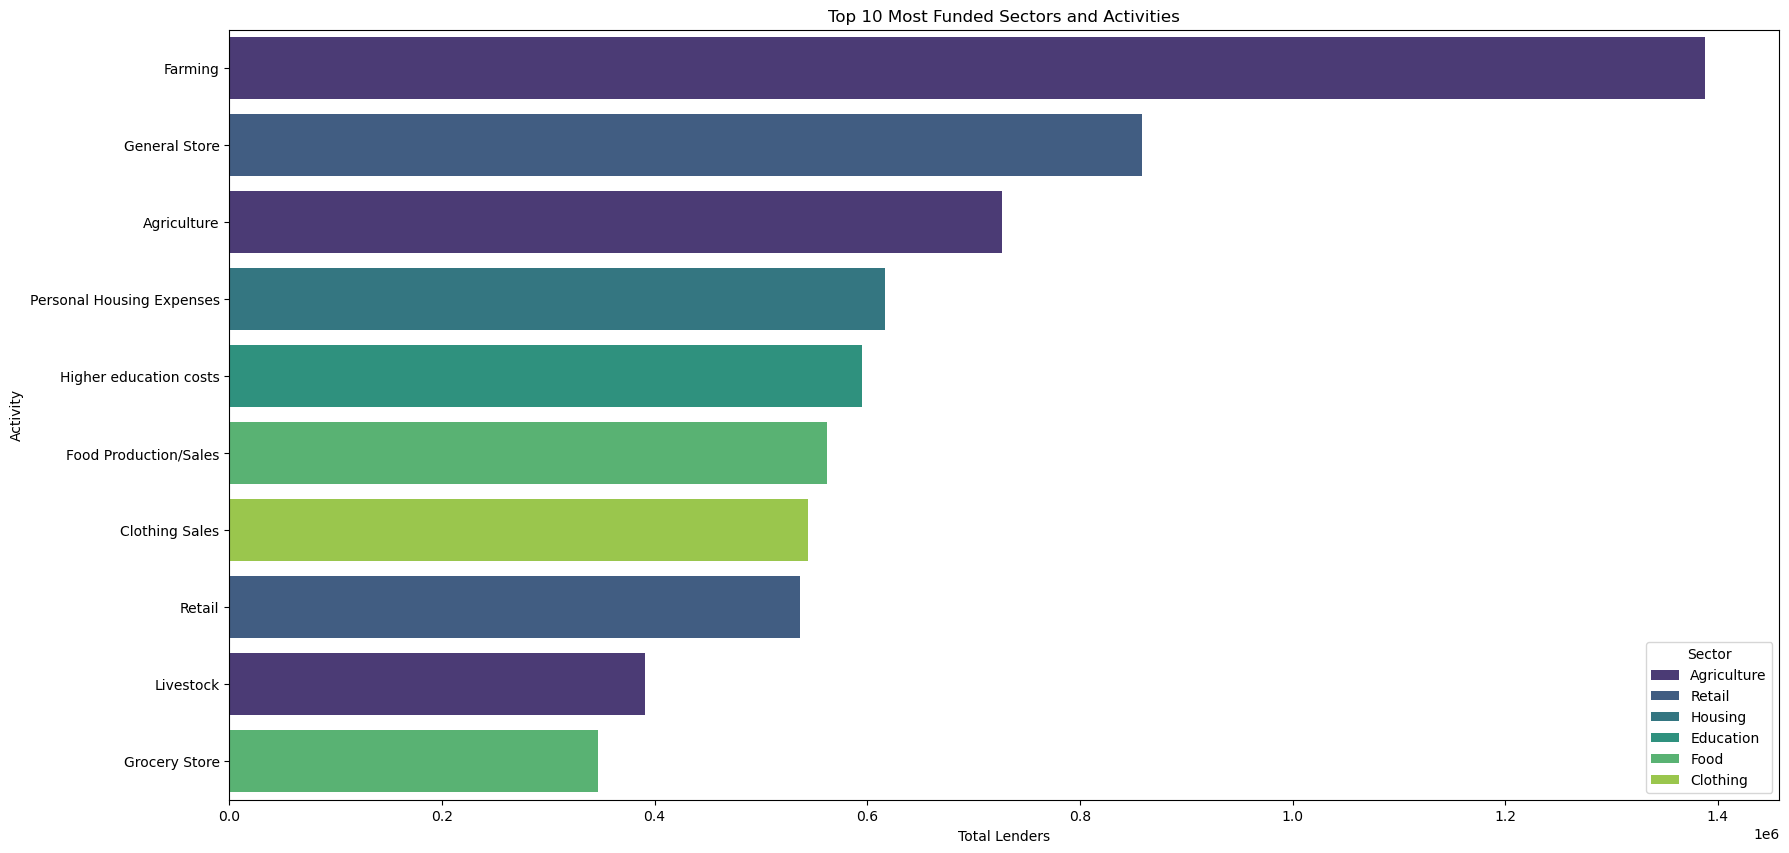

In [33]:
plt.figure(figsize=(20, 10))
sns.barplot(data=x1, x='total_lenders', y='activity', palette='viridis', hue='sector')
plt.title('Top 10 Most Funded Sectors and Activities')
plt.xlabel('Total Lenders')
plt.ylabel('Activity')
plt.legend(title='Sector')
plt.show()

Top 10 category activity most funded by lenders:
1. Farming
2. General Store
3. Agriculture
4. Personal Housing Expenses
5. Higher education cost
6. Food Production/Sales
7. Clothing Sales
8. Retail
9. Livestock
10. Grocery Store


In [34]:
# Top 10 least funded 
x2 = df3.sort_values('total_lenders', ascending=True).head(10)
x2

,sector,activity,total_lenders
76,Personal Use,Celebrations,50
118,Services,Adult Care,103
75,Manufacturing,Personal Care Products,141
134,Services,Event Planning,241
20,Arts,Patchwork,478
43,Food,Balut-Making,711
17,Arts,Film,815
124,Services,Bookbinding,1011
119,Services,Air Conditioning,1159
78,Personal Use,Funerals,1221


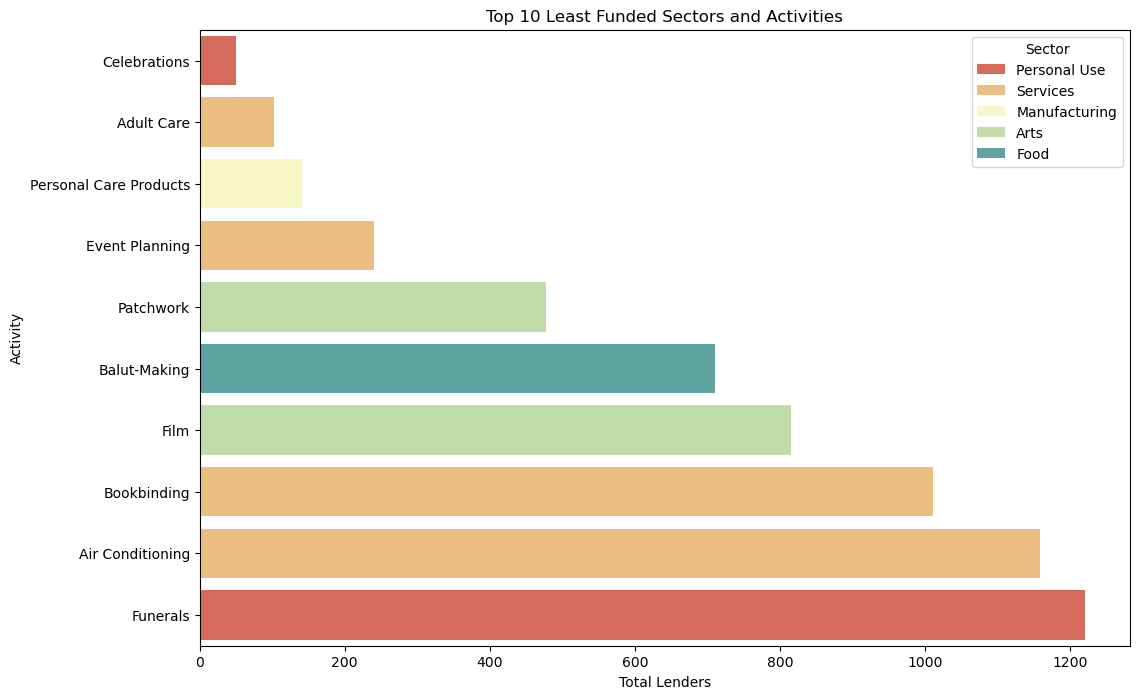

In [35]:
plt.figure(figsize=(12, 8))
sns.barplot(data=x2, x='total_lenders', y='activity', palette='Spectral', hue='sector')
plt.title('Top 10 Least Funded Sectors and Activities')
plt.xlabel('Total Lenders')
plt.ylabel('Activity')
plt.legend(title='Sector')
plt.show()

---

Checking top 10 category (Sector & Activity) that most people funded fully to their expectations?

In [36]:
df_fully = df.groupby(['funded_time', 'activity', 'sector'])['lender_count'].sum().reset_index(name='lender_count')
df_fully.head(10)

,funded_time,activity,sector,lender_count
0,2014-01-01 12:18:55+00:00,Rickshaw,Transportation,3
1,2014-01-01 12:27:40+00:00,Natural Medicines,Health,6
2,2014-01-01 13:00:00+00:00,Embroidery,Arts,8
3,2014-01-01 15:35:59+00:00,Bakery,Food,10
4,2014-01-01 15:45:51+00:00,Embroidery,Arts,6
5,2014-01-01 15:58:16+00:00,Clothing Sales,Clothing,8
6,2014-01-01 16:01:36+00:00,Transportation,Transportation,6
7,2014-01-01 16:06:47+00:00,Farming,Agriculture,5
8,2014-01-01 16:37:28+00:00,Manufacturing,Manufacturing,7
9,2014-01-01 16:44:27+00:00,Education provider,Education,8


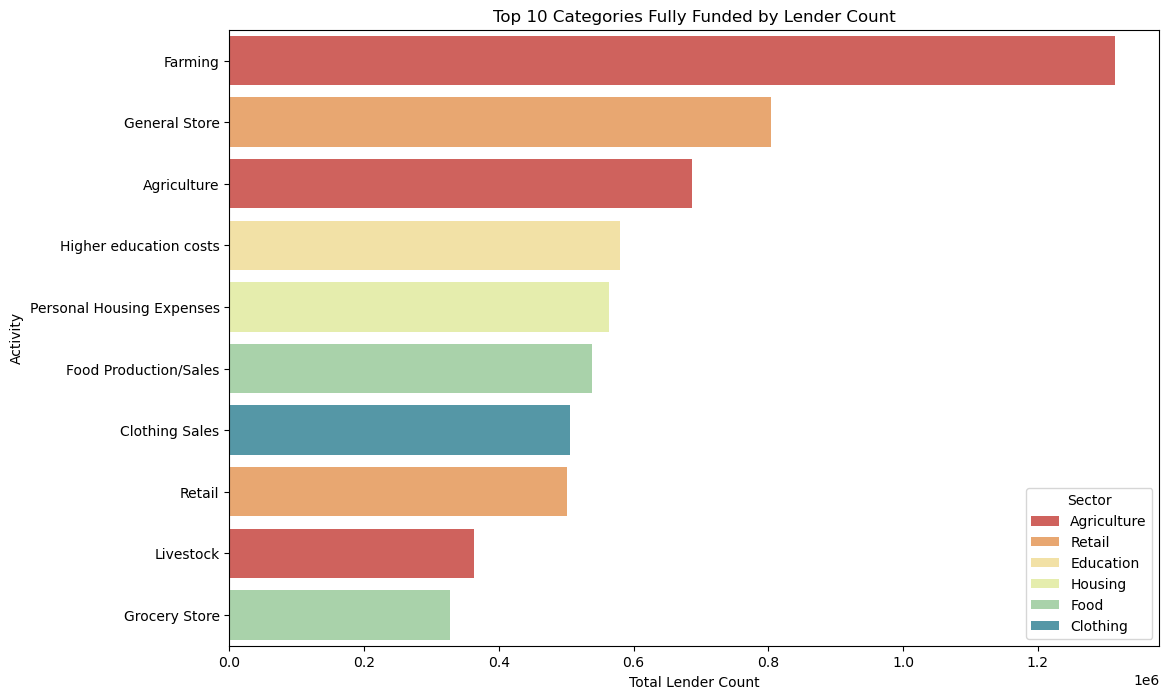

In [37]:
# Top 10 categories
df_fully = df_fully.groupby(['sector', 'activity'])['lender_count'].sum().reset_index().sort_values(by='lender_count', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_fully, x='lender_count', y='activity', hue='sector', palette='Spectral')
plt.title('Top 10 Categories Fully Funded by Lender Count')
plt.xlabel('Total Lender Count')
plt.ylabel('Activity')
plt.legend(title='Sector')
plt.show()

> Insight!
- Top 5 sector and activity categories with the highest number of fully funded loans.
- For these top 5 categories, report the total loan_amount requested by borrowers are:
    1. `Rickshaw (Transportation)`with 3 lenders
    2. `Natural Medicines (Health)` with 6 lenders
    3. `Embroidery (Arts)` with 8 lenders
    4. `Bakery (Food)` with 10 lenders
    5. `Embroidery(Arts)` with 6 lenders

---

### Correlations?

---

### Checking numbers

Checking all columns with numbers.

In [38]:
df.select_dtypes(include=['number']).columns

Index(['id', 'funded_amount', 'loan_amount', 'term_in_months', 'lender_count'], dtype='object')

In [39]:
# Calculate min, max, and median for the specified columns
min_val = df[['funded_amount', 'loan_amount', 'term_in_months', 'lender_count']].min()
max_val = df[['funded_amount', 'loan_amount', 'term_in_months', 'lender_count']].max()
med_val = df[['funded_amount', 'loan_amount', 'term_in_months', 'lender_count']].median()

# Display the results
print("Minimum values:\n", min_val)
print("\nMaximum values:\n", max_val)
print("\nMedian values:\n", med_val)

Minimum values:
 funded_amount     0.00
loan_amount      25.00
term_in_months    1.00
lender_count      0.00
dtype: float64

Maximum values:
 funded_amount    100000.00
loan_amount      100000.00
term_in_months      158.00
lender_count       2986.00
dtype: float64

Median values:
 funded_amount    450.00
loan_amount      500.00
term_in_months    13.00
lender_count      13.00
dtype: float64


### Minimum values:
- funded_amount     0.00
- loan_amount      25.00
- term_in_months    1.00
- lender_count      0.00
- dtype: float64

### Maximum values:
- funded_amount    100000.00
- loan_amount      100000.00
- term_in_months      158.00
- lender_count       2986.00
- dtype: float64

### Median values:
- funded_amount    450.00
- loan_amount      500.00
- term_in_months    13.00
- lender_count      13.00
- dtype: float64

---

Using heatmap to find correlations.

In [40]:
df4 = df[['loan_amount', 'funded_amount', 'lender_count', 'term_in_months']].describe()
df4

,loan_amount,funded_amount,lender_count,term_in_months
count,671205.00,671205.00,671205.00,671205.00
mean,842.40,786.00,20.59,13.74
std,1198.66,1130.40,28.46,8.60
min,25.00,0.00,0.00,1.00
25%,275.00,250.00,7.00,8.00
50%,500.00,450.00,13.00,13.00
75%,1000.00,900.00,24.00,14.00
max,100000.00,100000.00,2986.00,158.00


Checking correlation using `.corr`

In [41]:
df5 = df[['loan_amount', 'funded_amount', 'lender_count', 'term_in_months']].corr().reset_index()
df5

,index,loan_amount,funded_amount,lender_count,term_in_months
0,loan_amount,1.00,0.95,0.80,0.18
1,funded_amount,0.95,1.00,0.85,0.15
2,lender_count,0.80,0.85,1.00,0.23
3,term_in_months,0.18,0.15,0.23,1.00


Notes: Correlation ranged from -1 to 1.
- Correlation = 1 ➡️➡️➡️ very strong, positive correlation.
- Correlation = 0 ➡️➡️➡️ no correlation at all.
- Correlation = - (Negative) ➡️➡️➡️ Negative correlation
- Reference: [Correlation and Regression Analysis](https://sesricdiag.blob.core.windows.net/oicstatcom/TEXTBOOK-CORRELATION-AND-REGRESSION-ANALYSIS-EGYPT-EN.pdf)

> INSIGHT!
- loan_amount and funded_amount have almost 1 correlation, means the correlation between them are very strong, positive.
- funded_amount and lender_count have 0.85 correlation, means the correlation between them are very strong, positive.
- lender_count and loan_amount have 0.8 correlation, means the correlation between them are quite strong, positive.
- term_in_months have very weak or almost no correlation with:
  - loan_amount, funded_amount, lender_count.

Using heatmap

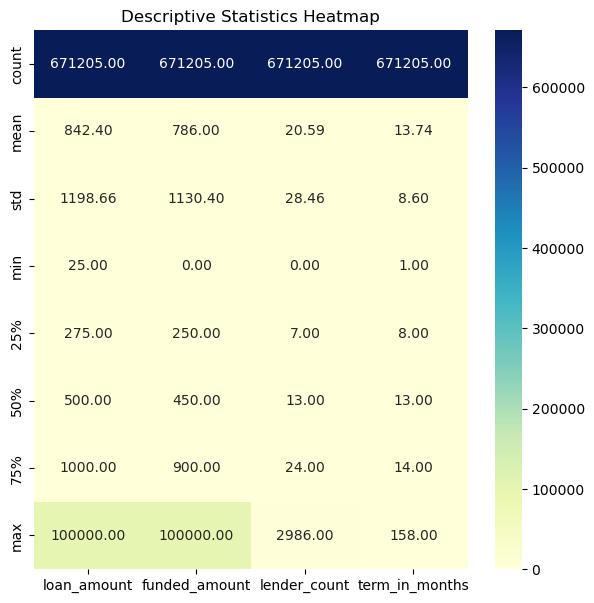

In [42]:
plt.figure(figsize=(7,7))
sns.heatmap(df4, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Descriptive Statistics Heatmap')
plt.show()

Using `heatmap` + `.corr`

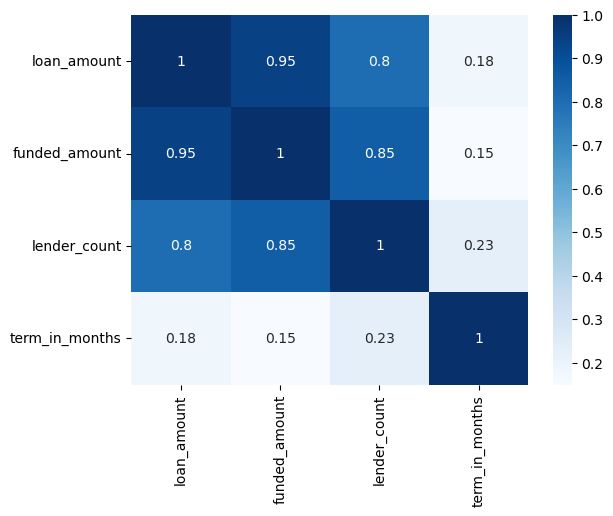

In [43]:
df4 = df[['loan_amount', 'funded_amount', 'lender_count', 'term_in_months']]
correlation_matrix = df4.corr()
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='Blues')

Checking correlation Using Pairplot

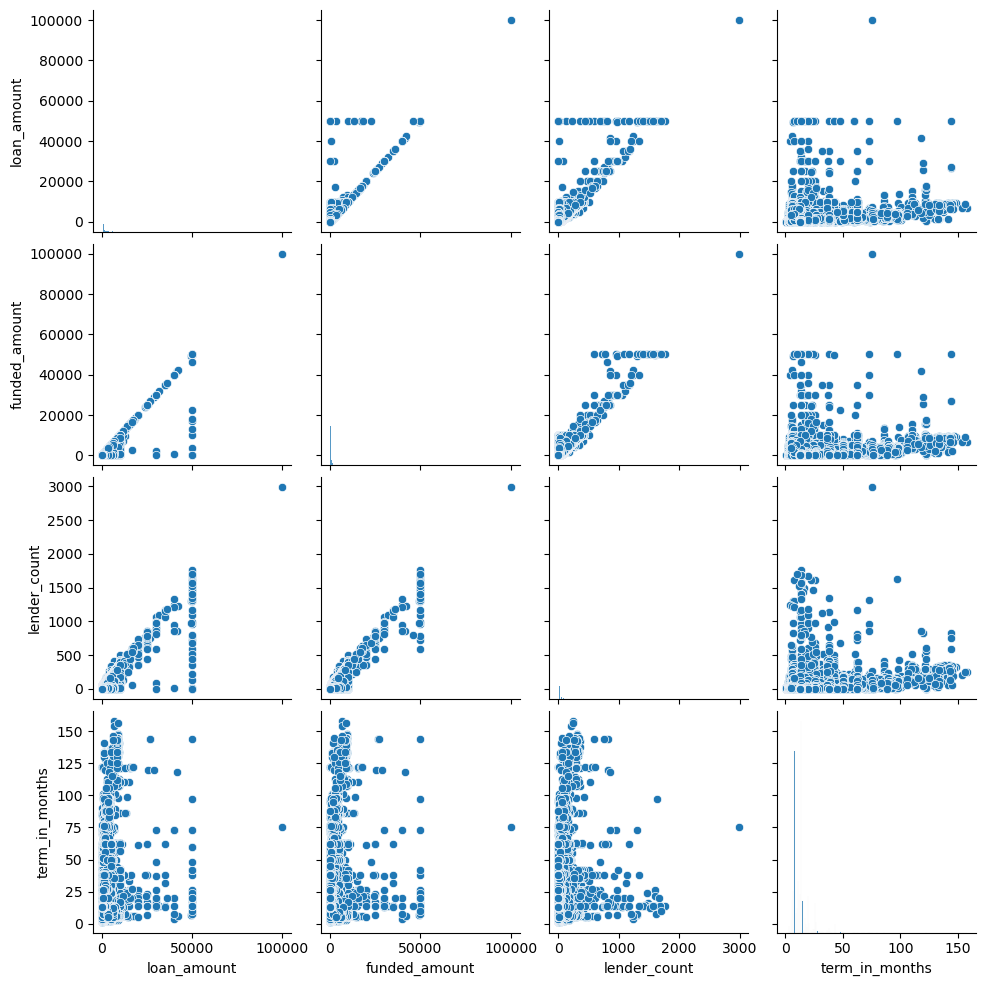

In [44]:
sns.pairplot(df[['loan_amount', 'funded_amount', 'lender_count', 'term_in_months']])

> Insight!
> INSIGHT!
- loan_amount and funded_amount have positive correlation, means the correlation between them are very strong.
- funded_amount and lender_count have positive correlation, means the correlation between them are very strong.
- lender_count and loan_amount have positivecorrelation, means the correlation between them are quite strong.
- term_in_months have very weak or almost no correlation with:
  - loan_amount, funded_amount, lender_count.

How to read:

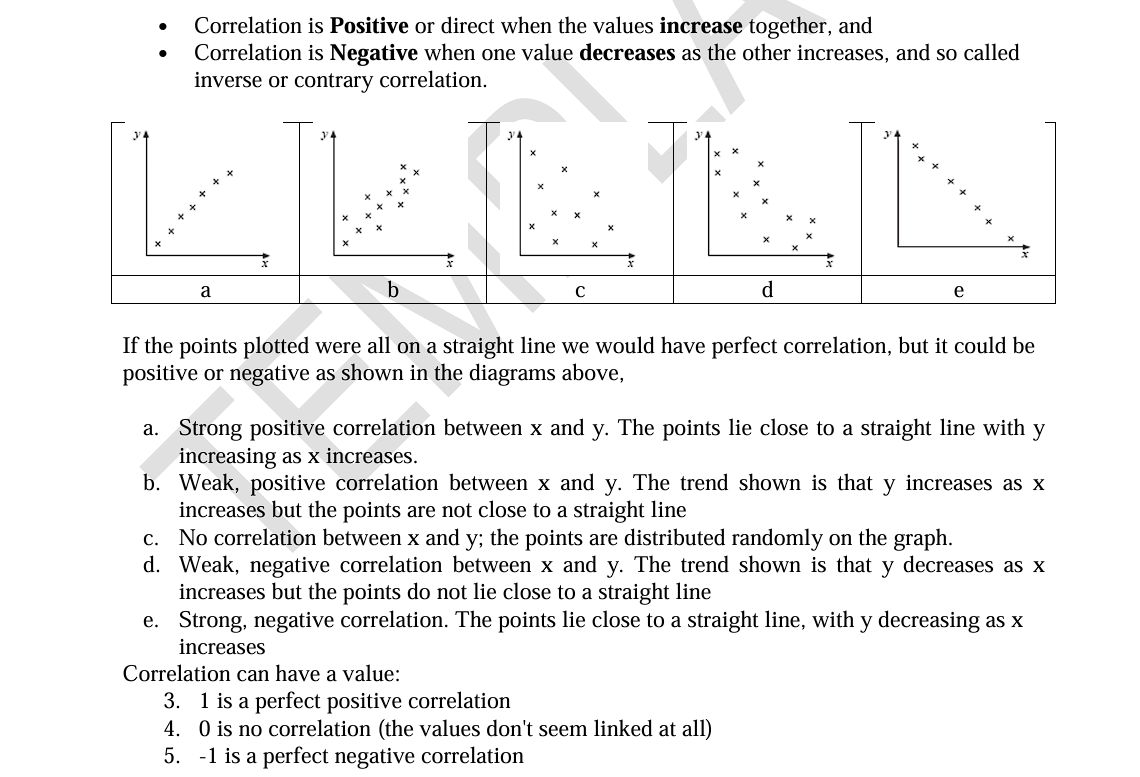
Reference: [Correlation and Regression Analysis](https://sesricdiag.blob.core.windows.net/oicstatcom/TEXTBOOK-CORRELATION-AND-REGRESSION-ANALYSIS-EGYPT-EN.pdf)

---

In [45]:
# Exchange rate IDR
IDR = 15000

# Convert the currency
df['loan_amount_IDR'] = df['loan_amount'] * IDR
df['funded_amount_IDR'] = df['funded_amount'] * IDR

# Display the updated dataframe
df_IDR = df[['loan_amount', 'loan_amount_IDR', 'funded_amount', 'funded_amount_IDR']]
df_IDR.head()

,loan_amount,loan_amount_IDR,funded_amount,funded_amount_IDR
0,300.00,4500000.00,300.00,4500000.00
1,575.00,8625000.00,575.00,8625000.00
2,150.00,2250000.00,150.00,2250000.00
3,200.00,3000000.00,200.00,3000000.00
4,400.00,6000000.00,400.00,6000000.00


In [46]:
# Create a new DataFrame with the IDR versions of the loan amount and funded amount
df_new = df[['id', 'loan_amount_IDR', 'funded_amount_IDR', 'activity', 'sector', 'use', 'country', 'region', 'currency', 'partner_id', 'posted_time', 'funded_time', 'term_in_months', 'lender_count', 'repayment_interval']]

# Display the new DataFrame
df_new.head()

,id,loan_amount_IDR,funded_amount_IDR,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
0,653051,4500000.00,4500000.00,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.00,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12.00,12,irregular
1,653053,8625000.00,8625000.00,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,Pakistan,Lahore,PKR,247.00,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,11.00,14,irregular
2,653068,2250000.00,2250000.00,Transportation,Transportation,To repair their old cycle-van and buy another ...,India,Maynaguri,INR,334.00,2014-01-01 09:58:07+00:00,2014-01-01 16:01:36+00:00,43.00,6,bullet
3,653063,3000000.00,3000000.00,Embroidery,Arts,to purchase an embroidery machine and a variet...,Pakistan,Lahore,PKR,247.00,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00,11.00,8,irregular
4,653084,6000000.00,6000000.00,Milk Sales,Food,to purchase one buffalo.,Pakistan,Abdul Hakeem,PKR,245.00,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00,14.00,16,monthly


In [47]:
df_new.tail()

,id,loan_amount_IDR,funded_amount_IDR,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
671200,1340323,375000.00,0.00,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",Paraguay,Concepción,USD,58.00,2017-07-25 16:55:34+00:00,NaT,13.00,0,monthly
671201,1340316,375000.00,375000.00,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,Unknown,KES,138.00,2017-07-25 06:14:08+00:00,2017-07-26 02:09:43+00:00,13.00,1,monthly
671202,1340334,375000.00,0.00,Games,Entertainment,Unknown,Kenya,Unknown,KES,138.00,2017-07-26 00:02:07+00:00,NaT,13.00,0,monthly
671203,1340338,375000.00,0.00,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,Unknown,KES,138.00,2017-07-26 06:12:55+00:00,NaT,13.00,0,monthly
671204,1340339,375000.00,0.00,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,Unknown,KES,138.00,2017-07-26 06:31:46+00:00,NaT,13.00,0,monthly


---
---

Save new df as csv file and excel file

In [48]:
df_new.to_csv('loan_kiva_new.csv')

---

Convert to category.

In [49]:
df['activity'] = df['activity'].astype('category')
df['sector'] = df['sector'].astype('category')
df['country'] = df['country'].astype('category')
df['region'] = df['region'].astype('category')
df['currency'] = df['currency'].astype('category')
df['partner_id'] = df['partner_id'].astype('category')

In [50]:
df.select_dtypes(include=['category']).columns

Index(['activity', 'sector', 'country', 'region', 'currency', 'partner_id'], dtype='object')